# Redes Neuronales en Pytorch

Es hora de que empecemos a interactuar con el objeto de estudio que nos interesa. Recordando lo discutido en la sesión anterior, la ventaja crucial de las redes neuronales es que nos quitan el peso de tener que buscar o crear características relevantes para el conjunto de datos. El precio que pagamos es un incremento en la cantidad de datos y en la capacidad de computo que necesitamos.


 Algo muy bueno de las redes neuronales es que son una tecnología con la que podemos empezar a trabajar muy rapidamente, gracias al excelente ecosistema de IA y Machine Learning con el que contamos. La lingua franca del machine learning es Python: la gran mayoría de librerías y herramientas están disponibles a aquellos que sepan apenas un poco de este lenguaje de programación, y es por esta razón que trabajaremos en este lenguaje. Sin embargo, también contamos con librerías y frameworks de inteligencia artificial en otros lenguajes, como Java, C++, JavaScript, etc.

Una de las librerias de redes neuronales mas utilizadas es Pytorch, y es con la que trabajaremos en el semillero. La razón de esta elección es sencilla: había que escoger una. Sin embargo, hay muchas otras librerías para trabajar con redes neuronales en Python. Lo importante es escoger una y aprenderla bien, ya después cogerle las riendas a otra será mucho más sencillo. En este cuaderno empezaremos a familiarizarnos con Pytorch.

## Modelos preentrenados

Empezamos el tour por Pytorch viendo los modelos de visión preentrenados a los que tenemos disposición. Como su nombre indica, un modelo de visión pre-entrenado es un modelo que puede "ver" imágenes, y que ya ha sido entrenado (que es la parte más complicada de todo este asunto) y lo podemos usar de una vez. De momento, podemos pensar en un modelo simplemente como una _función_, a la que damos un input (digamos, una imagen) y nos devuelve un output (digamos, nos dice si en la imagen hay un gato o no). Los detalles de esta _función_ los veremos con más profundidad más adelante, la idea de momento es hacer algo práctico.

*IMPORTANTE*:


1. ASEGURARSE QUE ESTAMOS USANDO LA GPU EN COLAB. PARA HACERLO, NOS VAMOS A LA ESQUINA SUPERIOR DERECHA Y LE DAMOS CLIC A LA FLECHA QUE ESTÁ A LA DERECHA DE DONDE DICE RAM, DISCO. SELECCIONAMOS MODIFICAR TIPO DE EJECUCIÓN, Y ELEGIMOS TPU4.  

2. Cargar todos los archivos necesarios en Colab, arrastrándolos al espacio de ficheros. Los archivos se encuentran en el github


 A continuación hacemos la importación necesaria y llamamos a una función que nos permite ver los modelos que tenemos a nuestra disposición.



In [1]:
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

La diferencia entre cada modelo corresponde a su arquitectura. De momento escojamos el modelo ResNet101 para empezar a jugar.

In [3]:
resnet = models.resnet101(weights= models.ResNet101_Weights.DEFAULT)

¿Que se ha descargado? Podemos analizar la arquitectura el modelo ResNet101 de la siguiente forma:

In [4]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

El output anterior corresponde a la arquitectura de la red neuronal. No nos preocupemos si no entendemos nada, la promesa es que a lo largo del semillero aprenderemos que significan todas esas cosas.

El modelo ResNet fue entrenado en el dataset ImageNet, el cual contiene imágenes en 1000 categorías distintas. ¡Intentemos probar con una imagen a ver que pasa! Primero debemos realizar un pre-procesamiento para convertir las imágenes a cosas que pueda recibir la red neuronal. El modulo de _torchvision_ contiene _transforms_, el cual permite crear facilmente funciones que actuen como pipelines de pre-procesamiento de imágenes. A continuación creamos una función que

1. Escala la imagen a _256 x 256_

2. La recorta a _224 x 224_ al rededor del centro

3. La transforma a un tensor, el cual es un arreglo multidimensional de Pytorch, similar a los arreglos de Numpy. En este caso, obtenemos un arreglo 3D, y las dimensiones corresponden a color, ancho y largo.

4. Normaliza las componentes RGB para que tengan medias y desviaciones estándar definidas, para que concuerden con las imágenes con las que la red neuronal fue entrenada y podamos obtener respuestas significativas.

In [5]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0.225]
    )
])

Ahora, escojamos una imagen y veamos que piensa la red neuronal de ella. Sube una imagen a los ficheros del cuaderno con el nombre _imagen.jpg_, y después corre las siguientes celdas. Yo usaré una imagen de mis dos gatitas, _Linda_ y _Bella_

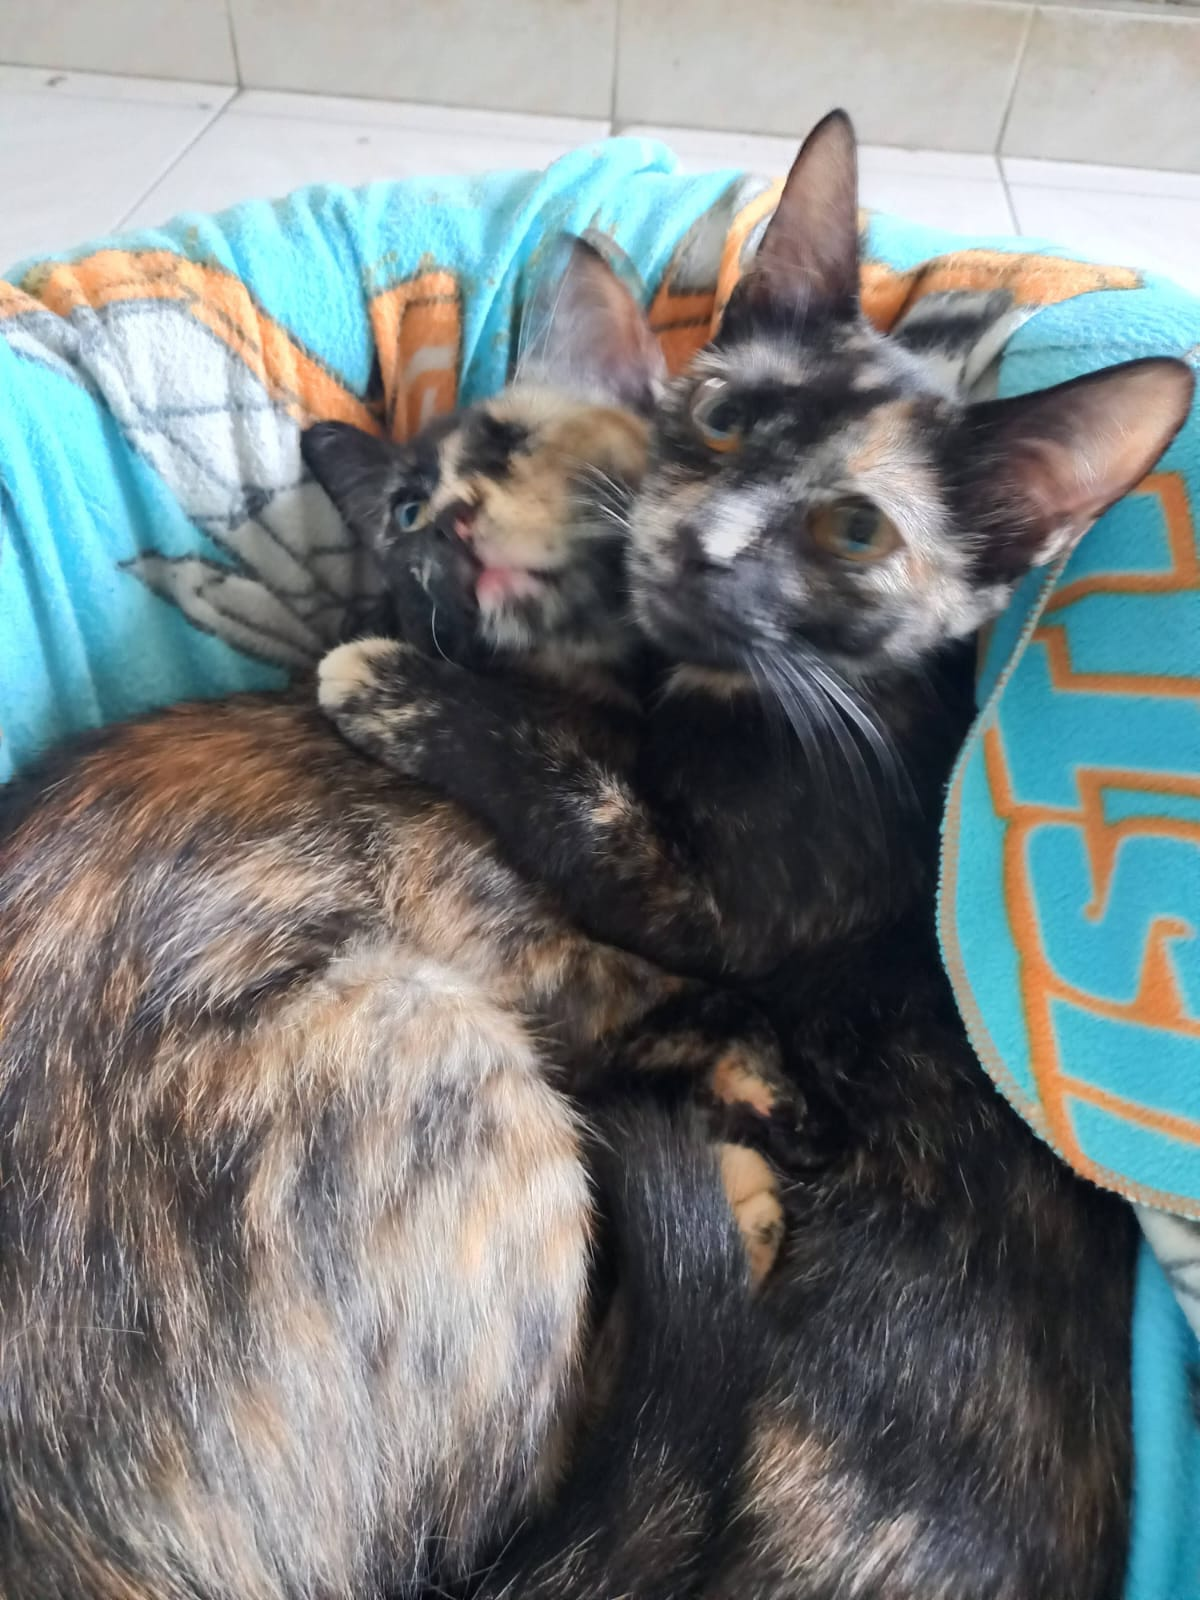

In [6]:
from PIL import Image
img = Image.open("linda_bella.jpg")
img

Ahora le pasamos la imagen a nuestro pipeline de preprocesamiento. Notemos que el resultado es un _tensor_ de Pytorch.

In [7]:
img_t = preprocess(img)
img_t

tensor([[[ 2.1804,  2.1804,  2.1462,  ...,  2.1975,  2.2318,  2.2318],
         [ 2.1633,  2.1290,  2.1290,  ...,  2.1290,  2.1804,  2.1975],
         [ 2.2147,  2.1633,  2.0605,  ...,  1.7523,  1.8037,  1.9064],
         ...,
         [-0.0287, -0.2513, -0.2171,  ..., -1.5357, -1.5699, -1.6384],
         [-0.1143, -0.3027, -0.1999,  ..., -1.5528, -1.5528, -1.6213],
         [-0.0801, -0.3198, -0.1999,  ..., -1.5699, -1.5014, -1.5699]],

        [[ 1.1506,  1.0280,  0.9755,  ...,  1.9909,  2.0959,  2.1660],
         [ 1.3081,  0.9755,  0.8704,  ...,  1.7283,  1.8683,  1.9209],
         [ 1.5182,  1.0805,  0.8004,  ...,  1.3957,  1.3782,  1.5182],
         ...,
         [-0.0749, -0.2675, -0.1975,  ..., -1.4230, -1.4405, -1.4930],
         [-0.1450, -0.3200, -0.1800,  ..., -1.4405, -1.4230, -1.4755],
         [-0.1099, -0.3375, -0.1800,  ..., -1.4580, -1.3880, -1.3880]],

        [[ 0.4788,  0.3045,  0.2696,  ...,  1.5942,  1.6988,  1.7685],
         [ 0.6531,  0.2348,  0.1128,  ...,  1

Ahora le hacemos una cosita más a la imagen. Calma, pronto entenderemos todo esto

In [8]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

El proceso de correr un modelo entrenado en nuevos datos se llama _inferencia_. Para hacer inferencia, primero tenemos que poner a la red neuronal en modo _evaluación_:

In [9]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Por fin estamos listos para correr el modelo en nuestra imagen. La siguiente linea hace inferencia sobre la imagen que le hemos proporcionado al modelo.

In [10]:
out = resnet(batch_t)
out

tensor([[ 3.0855e-02, -3.9777e-02, -4.9042e-01, -2.8459e-01, -2.9954e-01,
         -2.7549e-01,  1.0384e-01, -5.1266e-01,  6.2601e-01, -1.9473e-01,
         -6.7048e-02, -6.1972e-01, -8.3161e-01,  4.2108e-01, -5.9025e-01,
          3.5341e-02, -4.7433e-01, -1.9506e-01,  4.8313e-01, -4.0596e-01,
         -5.7394e-01, -2.0571e-01, -2.2912e-01, -6.3703e-01, -2.1306e-01,
         -4.4170e-01, -6.6954e-01, -2.6731e-01, -6.4597e-01, -4.9499e-01,
         -5.7986e-01, -4.1635e-01, -2.7343e-01, -2.8815e-01,  3.5272e-01,
         -2.8104e-01, -7.8064e-01,  3.0223e-01, -6.7809e-01, -7.2120e-01,
         -6.7005e-01,  1.1178e-01,  1.8810e-01, -8.0665e-02, -8.4279e-01,
         -2.3758e-01, -2.4290e-01, -5.6727e-01, -4.4161e-01, -5.8593e-01,
         -3.8266e-01, -6.1112e-01,  1.4966e-01, -1.0090e+00, -3.5601e-01,
          7.5771e-02, -2.2227e-01, -2.3584e-01, -7.7039e-01, -5.4661e-01,
         -8.0792e-01, -1.0735e+00, -9.0891e-02, -3.0522e-02, -4.0203e-01,
         -2.8375e-01,  4.9549e-01, -5.

Una operación colosal en la que se vieron inclucrados aproximadamente $175.000.000$ parámetros acaba suceder, y ha producido un vector de _1000_ componentes, una por cada categoría del dataset de ImageNet. Ahora, debemos obtener la componente con el puntaje más alto. Esta componente nos dirá lo que el modelo cree que hay en la imagen. Importa el archivo _clases.txt_ en los ficheros del Colab, y corre la siguiente celda.

In [11]:
with open('clases.txt') as f:
  labels = [line.strip() for line in f.readlines()]

Ahora, obtenemos la componente con el mayor score


In [12]:
  _, index = torch.max(out, 1)
index

tensor([285])

Por último, usamos el índice para acceder a la etiqueta correspondiente. Notemos que _index_ no es un número normal de Python, sino un tensor uno-dimensional. Por lo tanto, para acceder al valor debemos llamar al índice $index[0]$.

In [13]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

("285: 'Egyptian cat',", 60.85945510864258)

El modelo predice con un $60 \% $ de confianza que en la imagen hay un gato egipcio, para la imagen que usé de ejemplo. Bastante bien. En la siguiente celda implementamos nuevamente lo anterior pero sin tanta explicación, para poder hacer experimentos más facilmente. Mostramos las 5 categorías con más score.

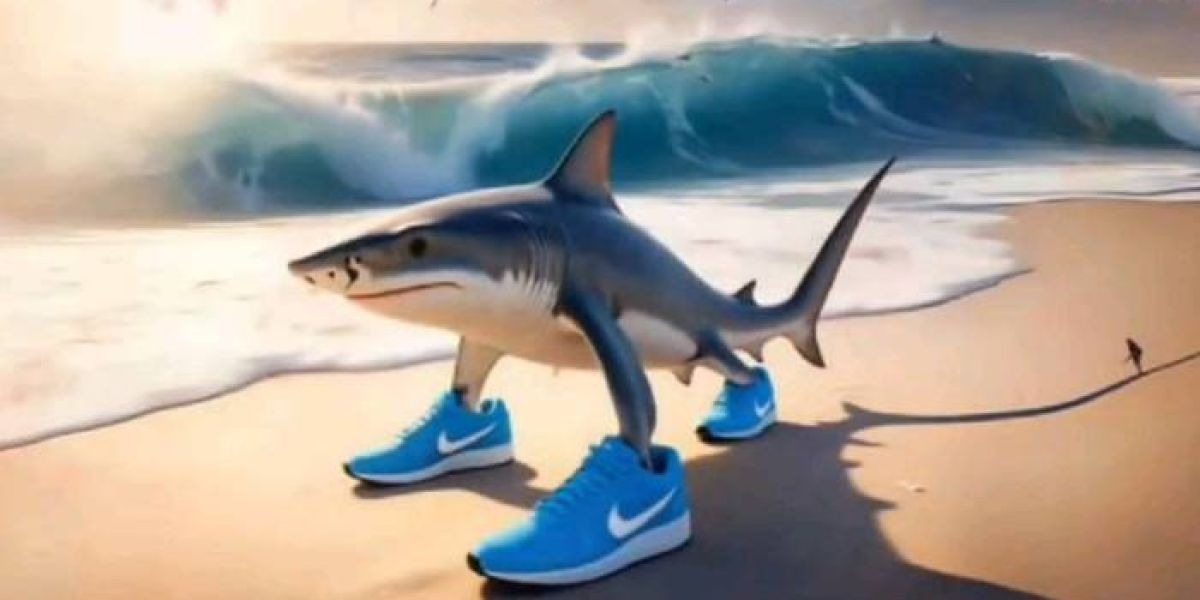

In [14]:
img = Image.open("tralalero.jpg").convert("RGB")
img


In [15]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
out = resnet(batch_t)
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
_, indices = torch.sort(out, descending=True)

[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[("4: 'hammerhead, hammerhead shark',", 55.41508102416992),
 ("3: 'tiger shark, Galeocerdo cuvieri',", 6.755369186401367),
 ("2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
  4.552346706390381),
 ("389: 'barracouta, snoek',", 0.2514250874519348),
 ("788: 'shoe shop, shoe-shop, shoe store',", 0.24362193048000336)]

## Caballos a cebras con una GAN

Ahora usaremos una red generativa adversarial, también conocida como una GAN, para transformar imágenes de caballos a imágenes de cebras. Para entender que es una GAN, imaginemos que queremo ganar plata vendiendo pinturas falsas de artistas famosos, como Monet, Picasso, o Dalí. Sin embargo, como somos criminales, y no pintores, es muy fácil para un experto en arte decidir si la pintura es falsa o no, y no podremos lucrarnos de nuestras fechorías.

La solución es muy sencilla: Contratemos a un estudiante de arte, y pongámoslo en la tarea de identificar si una obra que pintemos es falsa o verdadera. Por cada obra que el estudiante identifique correctamente como falsa o verdadera, el estudiante ganará una parte de lo que consigamos con nuestro negocio criminal. Entonces, entramos en un loop de entrenamiento, en el que el estudiante se vuelve muy bueno reconociendo si una obra es falsa o verdadera (ya que quiere ganar plata) y nosotros nos volvemos muy buenos creando pinturas irreconocibles de una verdadera, ya que queremos que toda la plata que se obtenga vaya para nosotros.

Dejemos el crimen y volvamos a la inteligencia artificial. El adjetivo _generativo_ significa que la IA _crea_ cosas (por ejemplo, imágenes), y el adjetivo _adversarial_ significa que dos redes neuronales están compitiendo una con la otra: tenemos una red _creadora_ y otra red _juzgadora_. La creadora se va volviendo mejor engañando a la juzgadora, y la juzgadora se va volviendo mejor en no ser engañada. La idea es que al final acabamos con una red excelente en crear imágenes indistinguibles de las encontradas en el conjunto de datos.

## CycleGAN

Usaremos una tipo de GAN llamado CycleGAN, la cual permite pasar imágenes de un tipo a otro. En este caso, convertiremos imágenes de caballos en imágenes de cebras. Más adelante en el semillero veremos que una CycleGAN y entenderemos el código que está a continuación, de momento solo queremos ver resultados.

In [16]:
import torch
import torch.nn as nn

class ResnetBlock(nn.Module):
    def __init__(self, dim):
        super(ResnetBlock, self).__init__()
        conv_block = [
            nn.ReflectionPad2d(1),
            nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=False),
            nn.InstanceNorm2d(dim, affine=False),
            nn.ReLU(True),

            nn.ReflectionPad2d(1),
            nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=False),
            nn.InstanceNorm2d(dim, affine=False),
        ]
        self.conv_block = nn.Sequential(*conv_block)

    def forward(self, x):
        return x + self.conv_block(x)


class ResnetGenerator(nn.Module):
    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9):
        assert(n_blocks >= 0)
        super(ResnetGenerator, self).__init__()

        model = [
            nn.ReflectionPad2d(3),
            nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=False),
            nn.InstanceNorm2d(ngf, affine=False),
            nn.ReLU(True),
        ]

        # downsampling
        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [
                nn.Conv2d(ngf * mult, ngf * mult * 2,
                          kernel_size=3, stride=2, padding=1, bias=False),
                nn.InstanceNorm2d(ngf * mult * 2, affine=False),
                nn.ReLU(True),
            ]

        # resnet blocks
        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResnetBlock(ngf * mult)]

        # upsampling
        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [
                nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                   kernel_size=3, stride=2,
                                   padding=1, output_padding=1, bias=False),
                nn.InstanceNorm2d(int(ngf * mult / 2), affine=False),
                nn.ReLU(True),
            ]

        model += [
            nn.ReflectionPad2d(3),
            nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0),
            nn.Tanh(),
        ]

        self.model = nn.Sequential(*model)

    def forward(self, input):
        return self.model(input)

netG = ResnetGenerator()
state_dict = torch.load("horse2zebra_0.4.0.pth", map_location="cpu")
netG.load_state_dict(state_dict, strict=False)
netG.eval()

ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), bias=False)
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)


A continuación, cargamos una imagen de un caballo, y definimos el pipeline para transformarla a algo que la red puede entender.

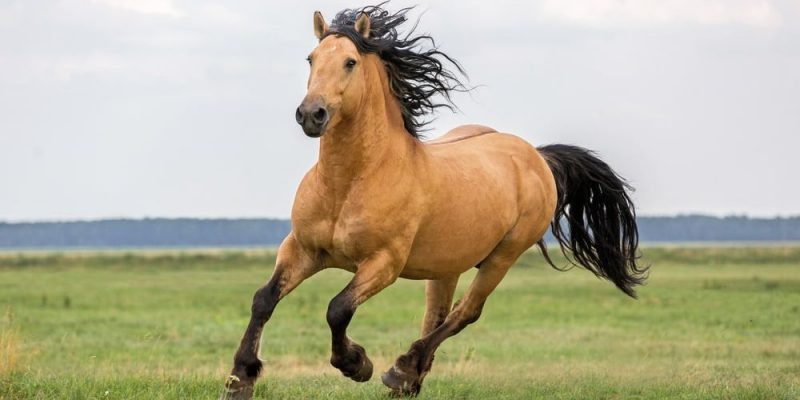

In [17]:
preprocess = transforms.Compose([transforms.Resize(256),
transforms.ToTensor()])

img = Image.open("caballo2.jpg")
img

Ahora hacemos inferencia sobre la imagen, para transformar el caballo a una cebra.

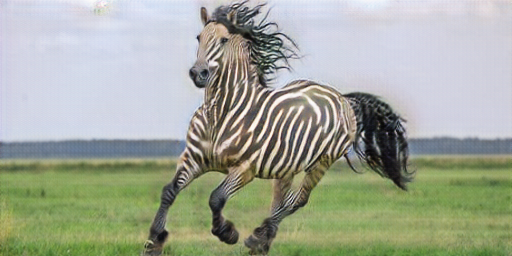

In [18]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
batch_out = netG(batch_t)
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img

## Segmentación de imágenes

El siguiente modelo permite segmentar imágenes

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


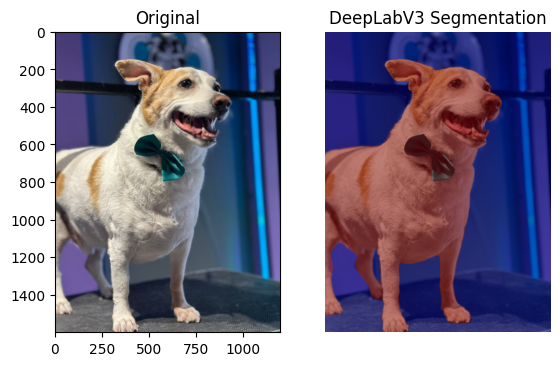

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


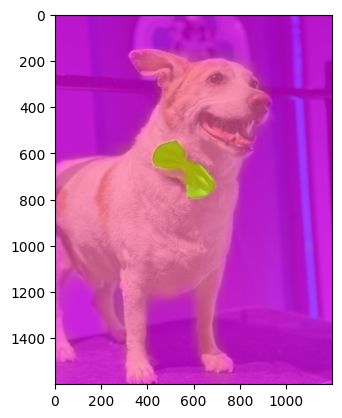

In [19]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# ----------- Load an image -------------
img = Image.open("copito.jpg")

# Preprocess
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(img).unsqueeze(0)

# ----------- DeepLabV3 Semantic Segmentation -------------
deeplab = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
deeplab.eval()

with torch.no_grad():
    output = deeplab(input_tensor)["out"][0]  # [21, H, W] for COCO classes
segmentation = output.argmax(0).byte().cpu().numpy()

# Show results
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(img)
plt.imshow(segmentation, alpha=0.5, cmap="jet")
plt.title("DeepLabV3 Segmentation")
plt.axis("off")
plt.show()

# ----------- Mask R-CNN Instance Segmentation -------------
maskrcnn = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
maskrcnn.eval()

with torch.no_grad():
    predictions = maskrcnn([transforms.ToTensor()(img)])

# Draw masks for objects above a threshold
masks = predictions[0]['masks']
scores = predictions[0]['scores']
labels = predictions[0]['labels']

plt.imshow(img)
for mask, score, label in zip(masks, scores, labels):
    if score > 0.5:
        mask = mask[0].cpu().numpy()
        plt.imshow(mask, alpha=0.4, cmap="spring")


### Procesamiento del lenguaje natural

Ahora, usamos un modelo pre-entrado a partir de GPT2 para realizar procesamiento de lenguaje natural. El modelo completa el prompt que se le entrega.

In [20]:
!pip install transformers --quiet

In [21]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
model = GPT2LMHeadModel.from_pretrained("distilgpt2")
model.eval()

def generate_text(prompt, max_length=50, temperature=0.5, top_k=50):
    inputs = tokenizer.encode(prompt, return_tensors="pt")
    outputs = model.generate(
        inputs,
        max_length=max_length,
        do_sample=True,
        top_k=top_k,
        temperature=temperature,
        pad_token_id=tokenizer.eos_token_id
    )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [22]:
prompt = "Now we are going to study"

print(f"Prompt: {prompt}")
print("Generated text:")
print(generate_text(prompt))

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Prompt: Now we are going to study
Generated text:
Now we are going to study the benefits of using modern technology to improve our health and well-being.




We will be working with the Department of Health to develop a new tool to help patients with chronic diseases achieve better health.


## Transcripción de voz

A continuación, un modelo pre-entrenado que permite transcribir lo que se dice (cuando abajo salga "grabando", habla!)

In [23]:

!pip install transformers datasets soundfile --quiet

In [24]:
# =======================
# Whisper Speech-to-Text in Colab (Mic recording)
# =======================


from transformers import pipeline
from IPython.display import Javascript
from google.colab import output
import base64, io
import soundfile as sf

# Load Whisper (small = decent speed + accuracy; you can also try "tiny", "base", "medium", "large")
asr = pipeline("automatic-speech-recognition", model="openai/whisper-small")

# ---------- JavaScript Recorder ----------
RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(reader.result.split(',')[1])
  reader.readAsDataURL(blob)
})

async function record(sec){
  const stream = await navigator.mediaDevices.getUserMedia({audio:true});
  const recorder = new MediaRecorder(stream);
  let data = [];

  recorder.ondataavailable = event => data.push(event.data);
  recorder.start();

  await sleep(sec*1000);
  recorder.stop();

  await new Promise(resolve => recorder.onstop = resolve);
  stream.getTracks().forEach(track => track.stop());

  const blob = new Blob(data);
  const text = await b2text(blob);
  return text;
}
"""

def record(sec=5, filename="recording.wav"):
    display(Javascript(RECORD))
    audio_b64 = output.eval_js(f'record({sec})')  # record n seconds
    audio_bytes = base64.b64decode(audio_b64)
    with open(filename, "wb") as f:
        f.write(audio_bytes)
    return filename

# ---------- Record from mic ----------
print("🎙️ Grabando por 5 segundos...")
audio_path = record(5)

# ---------- Transcribe ----------
print("\n📝 Transcripción:")
print(asr(audio_path)["text"])


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Device set to use cuda:0


🎙️ Grabando por 5 segundos...


<IPython.core.display.Javascript object>


📝 Transcripción:


`return_token_timestamps` is deprecated for WhisperFeatureExtractor and will be removed in Transformers v5. Use `return_attention_mask` instead, as the number of frames can be inferred from it.
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`. See https://github.com/huggingface/transformers/pull/28687 for more details.


 Hola, eso es una prueba para el semillero de redes neuronales.


In [25]:
# Clean, Colab-friendly install
!pip install transformers accelerate soundfile


### Generación de música

El siguiente modelo pre-entrenado permite generar música a partir de un prompt.

In [26]:
from transformers import pipeline
from IPython.display import Audio, display
import soundfile as sf
import numpy as np

# Load MusicGen
generator = pipeline("text-to-audio", model="facebook/musicgen-small")

prompt = "Jazz fusion with a piano solo "

# Generate audio (about 10 seconds)
out = generator(prompt, generate_kwargs={"max_length": 256})

# Extract audio and sampling rate
audio_arr = out["audio"]
sr = out["sampling_rate"]

# Fix shape: (1, 1, N) -> (N,)
if audio_arr.ndim == 3:
    audio_arr = np.squeeze(audio_arr)

# Save to file
sf.write("musicgen_demo.wav", audio_arr, sr)

# Play in notebook
display(Audio("musicgen_demo.wav"))



Device set to use cuda:0


In [28]:
# Install Hugging Face diffusers, accelerate, and some helpers
!pip install diffusers transformers accelerate safetensors


### Generación de imágenes

Por último, usamos un modelo pre-entrenado para generar imágenes a partir de un prompt. Les advierto que la siguiente celda se demorará bastante tiempo en cargar. Sin embargo, vale la pena!

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

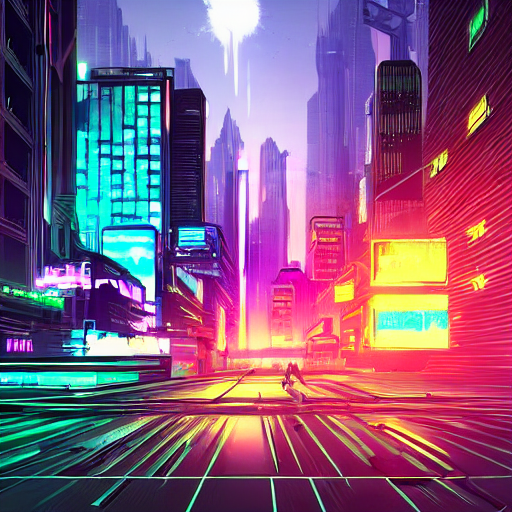

In [29]:
import torch
from diffusers import StableDiffusionPipeline
from IPython.display import display

# Load the model (Stable Diffusion v1.4 or v1.5 are lightest for Colab)
model_id = "CompVis/stable-diffusion-v1-4"

# Use half precision for speed if GPU is available
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Example prompt
prompt = "A cyberpunk cityscape at night with neon lights and flying cars, digital art"

# Generate
with torch.autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5).images[0]

# Show
display(image)

# Save
image.save("stable_diffusion_demo.png")


  0%|          | 0/50 [00:00<?, ?it/s]

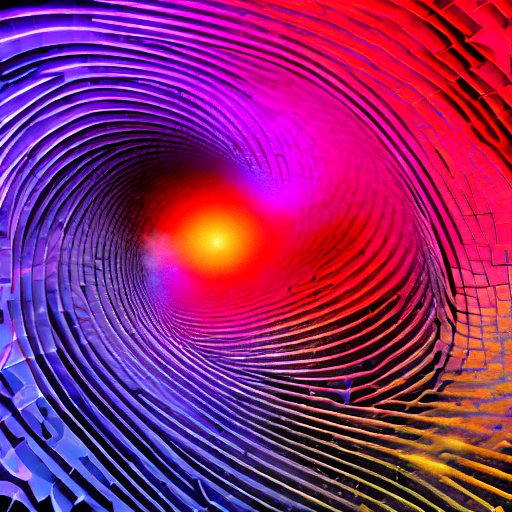

In [37]:
# Example prompt
prompt = "Conciusness understanding itself through chromatic aberration and conflicting spacetime-curves, devianart, majestic, best image ever"

# Generate
with torch.autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5).images[0]

# Show
display(image)

# Save
image.save("stable_diffusion_demo.png")
